# **Consumer Interaction Regression Prediction**

##### An retail company wants to send out an email to customers about a laptop promotion. The goal is to send out the email to customers who will click on it, and avoid sending it to those who won't. Using past website actvitiy from a similar activity done years prior, a logistic regression model will be trained to decide if a customer will get sent an email based on multiple variables. It will then be tested and mutliple metrics will be analyzed, determining if the exercise was a success.

Import Python script with neccessary methods and initialize a model:

In [ ]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import main
model = main.UserPredictor()

### **Training the Model**

Read in training data:

In [3]:
train_users = pd.read_csv(os.path.join("data", "train_users.csv"))
train_logs = pd.read_csv(os.path.join("data", "train_logs.csv"))
train_y = pd.read_csv(os.path.join("data", "train_y.csv"))

**train_users** is a record of every customer to have visited the company's website in the past

In [4]:
train_users.head()

,user_id,names,age,past_purchase_amt,badge
0,0,Adriana Mcclure,26,39.344704,gold
1,1,Stacy Gilmore,67,15.840151,silver
2,2,Joanna Walsh,50,1099.420085,bronze
3,3,Eduardo Moore,65,5.880239,bronze
4,4,Angela Freeman,88,1312.296847,bronze


**train_logs** is each individual visit from the above customers, including the specific product they were viewing and for how long they viewed

In [5]:
train_logs.head()

,user_id,date,url,seconds
0,0,10/27/2021,/keyboard.html,159
1,0,3/15/2021,/blender.html,15
2,0,7/29/2021,/keyboard.html,11
3,0,1/27/2021,/laptop.html,142
4,1,3/1/2021,/keyboard.html,78


**train_y** contains the results from a previous, similar email test, which will be used to train the model

In [6]:
train_y.head()

,user_id,y
0,0,False
1,1,False
2,2,True
3,3,False
4,4,False


**add_logs_as_features()** method, contained in the Python script, aggregates the values across the logs and assigns them to the respective customer.

Now, total time spent on websites, number of pages visited, how many of them were the laptop, and the number of days before first and last visit are added:

In [14]:
model.add_logs_as_features(train_users, train_logs).head(10)

,user_id,names,age,past_purchase_amt,badge,time_spent,pages_visited,laptop_visits,date_span
0,0,Adriana Mcclure,26,39.344704,gold,327.0,4.0,1.0,273.0
1,1,Stacy Gilmore,67,15.840151,silver,78.0,1.0,0.0,0.0
2,2,Joanna Walsh,50,1099.420085,bronze,432.0,4.0,0.0,163.0
3,3,Eduardo Moore,65,5.880239,bronze,0.0,0.0,0.0,0.0
4,4,Angela Freeman,88,1312.296847,bronze,0.0,0.0,0.0,0.0
5,5,Hannah Savage,24,148.939899,silver,0.0,0.0,0.0,0.0
6,6,Jacob Perry,75,9.708406,silver,592.0,7.0,2.0,163.0
7,7,Thomas Morrison,52,51.593979,silver,0.0,0.0,0.0,0.0
8,8,Mr. Isaac Barry,41,2.730201,bronze,420.0,6.0,1.0,284.0
9,9,Melissa Adams,38,54.052274,bronze,97.0,1.0,0.0,0.0


The model is then fitted on the training data using the **fit()** method from the Python script:

In [8]:
model.fit(train_users, train_logs, train_y)

### **Testing the Model**

To prepare for the testing of the model, the test datasets are read in:

In [9]:
# read in the test data sets
test_users = pd.read_csv(os.path.join("data", "test_users.csv"))
test_logs = pd.read_csv(os.path.join("data", "test_logs.csv"))
test_y = pd.read_csv(os.path.join("data", "test_y.csv"))

#### **Model Coefficients**

Insight into how much each coefficient is impacting the model. The three most impactful are past purchase amount, time spent on webpages, and total pages visited. All increase the odds of the customer clicking the email link. Age, on the other hand, decreases the chances of the link being clicked as age increases. This is likely due to younger ages being more tech-savvy and taking advantage of deals they find online. Laptop page visits and days between first and last website visit have impacts of lower magnitudes on the probability.

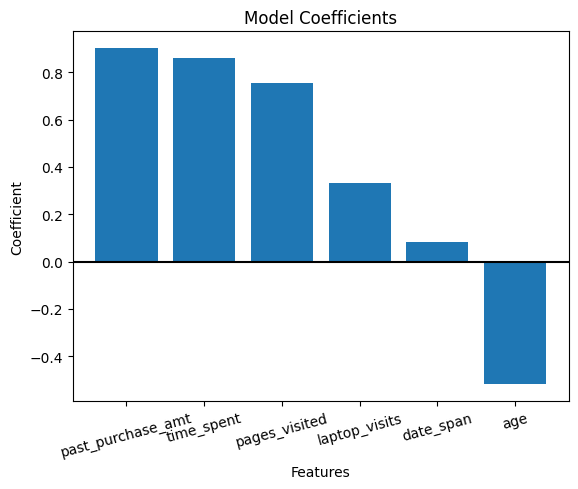

In [11]:
df = model.feature_coefficients(train_users, train_logs, train_y)

plt.bar(x = df['Feature'], height = df['Coefficient'])
plt.xticks(rotation=15)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.axhline(y=0, color='black')  # Add horizontal line at y = 0
plt.title('Model Coefficients')
plt.show()

#### **Model Performance**
Looking at various performance metrics of the model, the consistency and values of scores indicate high performance and a good ability to combat imbalances in the data:

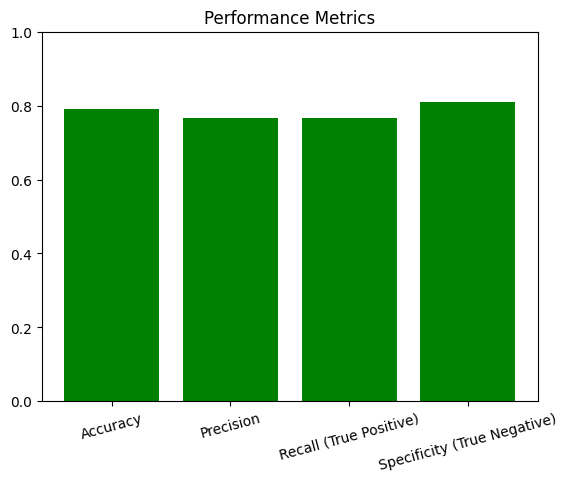

,Metric,Value
0,Accuracy,0.789900
1,Precision,0.766315
2,Recall (True Positive),0.765461
3,Specificity (True Negative),0.809812


In [12]:
model.performance(train_users, train_y, test_users, test_logs, test_y)

#### **probability() Method**

Using the probability method from main.py, the odds of any customer clicking on the email link can be calculated

In this example, it is a 56 year-old who has never bought any products before, but has spend 30 seconds on a total of 3 webpages, 2 of them unique, and had 4 days between their first and last visits:

In [13]:
model.probability(56, 0, 30, 3, 2, 4)

'This customer, 56 years of age, has spent $0 on past purchases, visited 3 webpages, 2 of them for the laptop, for a total of 0.5 minutes, and had 4 days between their first and last visit. They have a 52.6% chance of clicking on the link in the email.'

## **Closing Remarks**
After being tasked with this problem of sending out promotional emails in the most efficient manner, the model turned out to be a success; 77% of customers that would have been sent the email clicked on the link, and 81% of those who wouldn't have clicked weren't sent the email in the first place. The model allows the company to efficiently send the email out to its target customers to increase sales, while also retaining cash and resources that weren't wasted on emails to customers who wouldn't have used the promotion. In future events and promotions similar to this one, the company will have a reliable and accurate model to deploy.